Perry Fox 6/20/23

# Page View Time Series Visualizer
"For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth."

This notebook was created first and then adapted to the replit python file for unit testing and submission:
https://replit.com/@Pyrus277/boilerplate-page-view-time-series-visualizer

### Data description: 
- Rows: Dates  
- Cols: Page views  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import seaborn as sns
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')

#### A look at the data and removal of page view date outliers

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.isnull().sum()

value    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


In [6]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g'))).T

,count,mean,std,min,25%,50%,75%,max
value,1304,67220.7,59339.6,1201,35757.8,57197.5,83883,1.17366e+06


In [7]:
# check if duplicates. If none, row count should be 1304
df.reset_index().duplicated().shape

(1304,)

In [8]:
# remove > 2.5 percentile outliers 
df = df[(df['value'] > df['value'].quantile(0.025)) &
(df['value'] < df['value'].quantile(0.975))]

In [9]:
df.shape

(1238, 1)

#### Create a line plot 

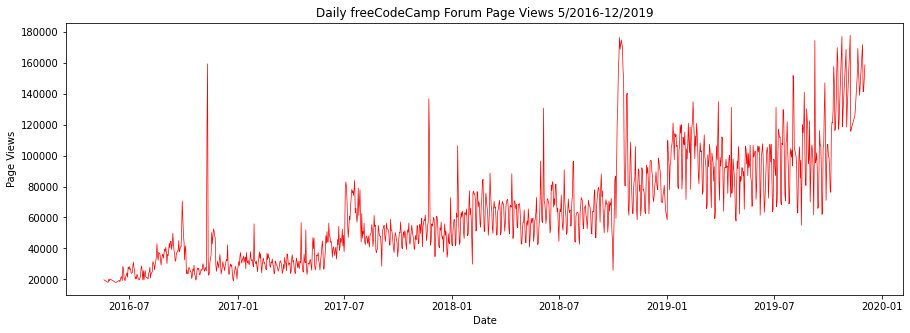

In [10]:
df_line = df.copy()
# convert the df index to datetime format so mdates can work to divvy it up.
df_line.index = pd.to_datetime(df_line.index)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_line, 'r', linewidth=.70)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 7]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
plt.show()

#### Create a bar plot 
- Show avg daily page views for each month grouped by year. 
- Legend should show month labels and have a title of Months
- x-axis label = 'Years', y-axis label = 'Average'

In [11]:
df_bar = df.copy()
df_bar.index = pd.to_datetime(df_bar.index)

In [12]:
df_bar.reset_index(inplace=True)
df_bar['month'] = df_bar.date.dt.month_name()
df_bar['year'] = df_bar.date.dt.year

In [15]:
df_bar.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


In [16]:
df_bar = df_bar.groupby(['year','month']).agg(mean_total_bill=("value", 'mean'))
df_bar = df_bar.reset_index()

In [17]:
df_bar.head()

,year,month,mean_total_bill
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


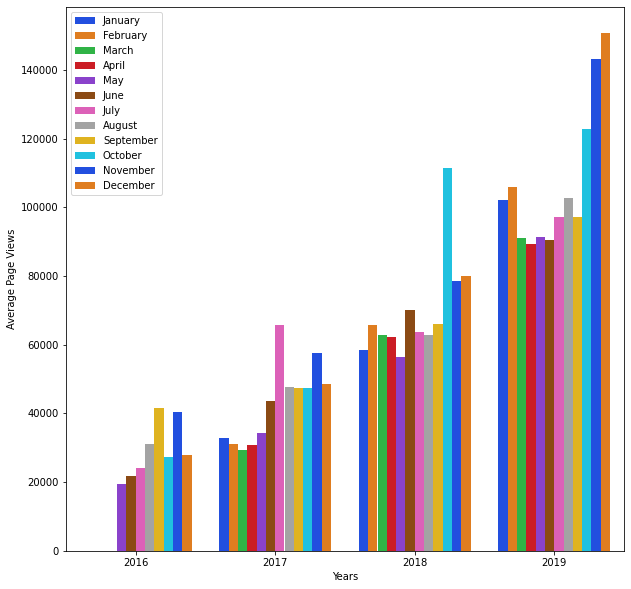

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='year',
            y='mean_total_bill',
            hue='month',
            hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December'],
            palette="bright",
            data=df_bar)
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(loc='upper left')

#### Create a box plot

In [19]:
df_box = df.copy()
df_box.index = pd.to_datetime(df_box.index)
df_box.reset_index(inplace=True)

In [20]:
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [21]:
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


In [22]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
               'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 0, 'Month')

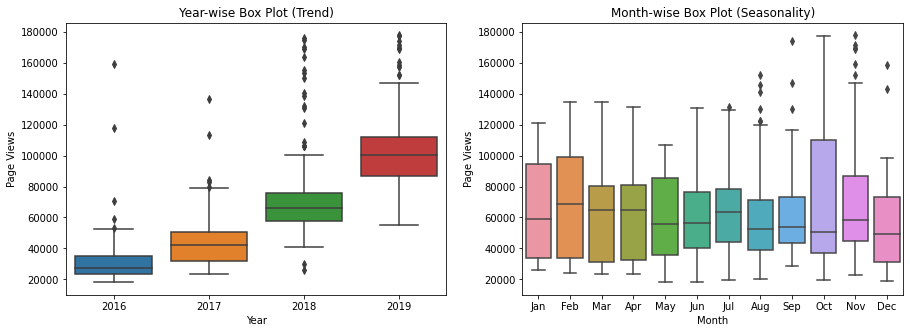

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_ylabel('Page Views')
axes[0].set_xlabel('Year')

sns.boxplot(x=df_box['month'],y=df_box['value'], order=months, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_ylabel('Page Views')
axes[1].set_xlabel('Month')


#### Notes
For each chart make sure to use a copy of the dataframe

In [ ]:
# Given:
# df_box = df.copy()
# df_box.reset_index(inplace=True)
# df_box['year'] = [d.year for d in df_box.date]
# df_box['month'] = [d.strftime('%b') for d in df_box.date]